The notebook is taken from https://github.com/csinva/gan-pretrained-pytorch

<a href="https://colab.research.google.com/github/HSE-LAMBDA/DeepGenerativeModels/blob/master/seminars/seminar-1/2.cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal
The **goal** of notebook is to demonstrate how generative models works

In this notebook you run pre-trained generative (DCGAN) model to generate new images

In [1]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pylab
import numpy as np
%load_ext autoreload
%autoreload 2

COLAB = False # Change this variable if you are running the notebook on Colab
if COLAB:
    !git clone https://github.com/HSE-LAMBDA/DeepGenerativeModels.git
    %cd DeepGenerativeModels/seminars/seminar-1/

SyntaxError: unexpected EOF while parsing (<ipython-input-1-88875d162e6a>, line 15)

## define the models

In [2]:
num_gpu = 1 if torch.cuda.is_available() else 0

# load the models
from dcgan import Discriminator, Generator

D = Discriminator(ngpu=num_gpu).eval()
G = Generator(ngpu=num_gpu).eval()

map_location = None # function which specifies device location for weights storage
if num_gpu == 0: map_location=lambda storage, loc: storage
# load weights
D.load_state_dict(torch.load('weights/netD_epoch_199.pth',map_location=map_location))
G.load_state_dict(torch.load('weights/netG_epoch_199.pth',map_location=map_location))
if torch.cuda.is_available():
    D = D.cuda()
    G = G.cuda()

# generate some images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

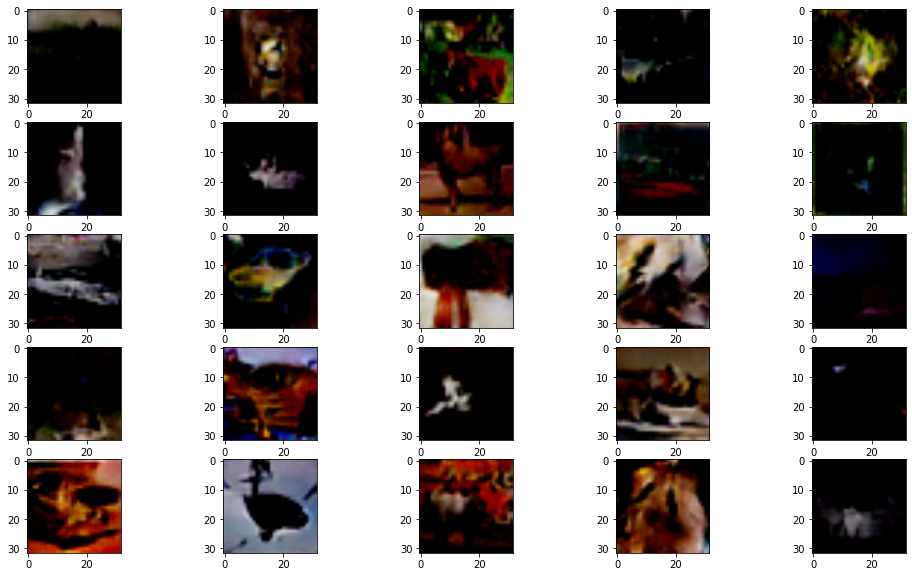

In [3]:
batch_size = 25
latent_size = 100

fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = G(fixed_noise)


# z = torch.randn(batch_size, latent_size).cuda()
# z = Variable(z)
# fake_images = G(z)

fake_images_np = fake_images.cpu().detach().numpy()
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 3, 32, 32)
fake_images_np = fake_images_np.transpose((0, 2, 3, 1))

# Visualize images

In [ ]:
# WRITE YOUR CODE HERE

# run discriminator

In [4]:
outputs = D(fake_images)
print(outputs)

tensor([2.8552e-02, 4.7569e-03, 3.7571e-04, 3.8305e-02, 6.6121e-03, 7.4122e-01,
        1.0099e-01, 7.4418e-02, 7.3250e-04, 1.0889e-02, 8.5472e-01, 5.4404e-04,
        3.7688e-02, 8.3672e-02, 5.5861e-03, 4.0050e-02, 2.2156e-03, 7.4308e-02,
        5.2597e-02, 1.0488e-02, 2.9860e-03, 1.7579e-02, 2.7016e-03, 1.7685e-03,
        6.8212e-02], grad_fn=<SqueezeBackward1>)
